In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
from google.colab import files
uploaded = files.upload()


df = pd.read_csv('/content/netflix_titles.csv')

df.head()

Saving netflix_titles.csv to netflix_titles.csv


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [30]:
print(f'Dataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom.')

Dataset memiliki 8807 baris dan 12 kolom.


In [31]:
print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [32]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [33]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

df['country'] = df['country'].fillna('Unknown')
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df['rating'] = df['rating'].fillna('Unknown')

In [34]:
df['rating'] = df['rating'].fillna('Unknown')

df[['duration_int', 'duration_type']] = df['duration'].str.extract(r'(\d+)\s*(\w+)?')
df['duration_int'] = pd.to_numeric(df['duration_int'], errors='coerce')

In [35]:
df.duplicated().sum()

np.int64(0)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        8807 non-null   object        
 1   type           8807 non-null   object        
 2   title          8807 non-null   object        
 3   director       8807 non-null   object        
 4   cast           8807 non-null   object        
 5   country        8807 non-null   object        
 6   date_added     8709 non-null   datetime64[ns]
 7   release_year   8807 non-null   int64         
 8   rating         8807 non-null   object        
 9   duration       8804 non-null   object        
 10  listed_in      8807 non-null   object        
 11  description    8807 non-null   object        
 12  duration_int   8804 non-null   float64       
 13  duration_type  8804 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(11)
memory usage: 963

In [37]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_int,duration_type
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,min
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,Season
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,Season
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,Seasons


<ipython-input-38-3040468073>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


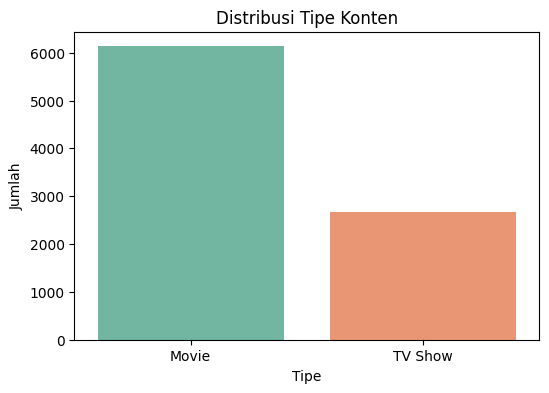

In [38]:
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df, palette='Set2')
plt.title('Distribusi Tipe Konten')
plt.xlabel('Tipe')
plt.ylabel('Jumlah')
plt.show()

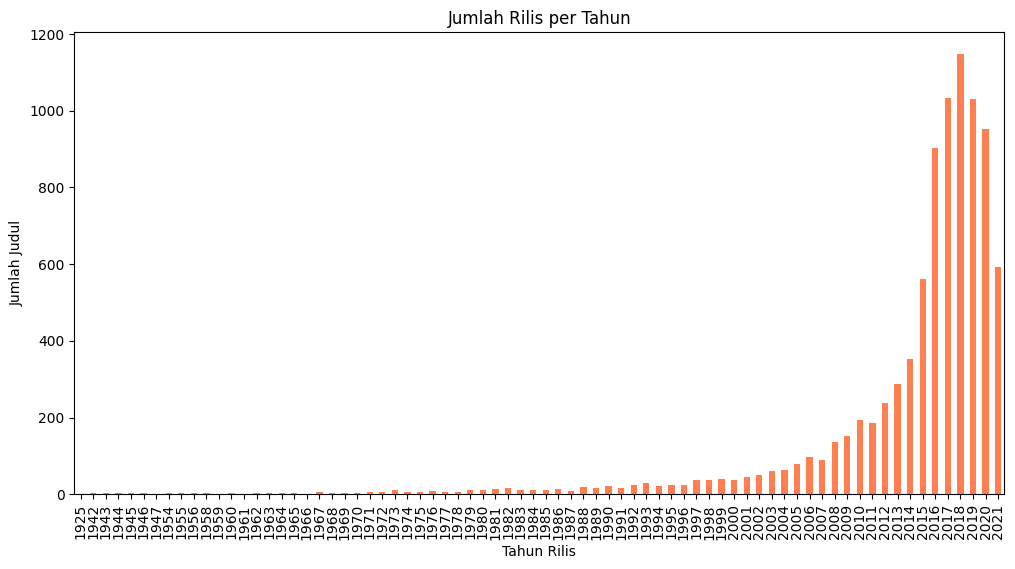

In [39]:
plt.figure(figsize=(12,6))
df['release_year'].value_counts().sort_index().plot(kind='bar', color='coral')
plt.title('Jumlah Rilis per Tahun')
plt.xlabel('Tahun Rilis')
plt.ylabel('Jumlah Judul')
plt.show()

<ipython-input-40-2528957328>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


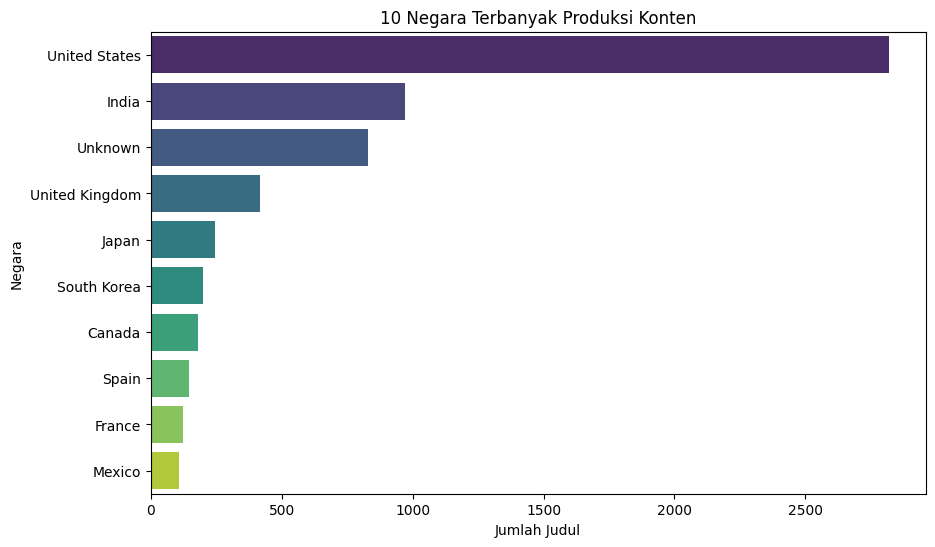

In [40]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('10 Negara Terbanyak Produksi Konten')
plt.xlabel('Jumlah Judul')
plt.ylabel('Negara')
plt.show()


<ipython-input-41-2319646261>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(genres), palette='pastel')


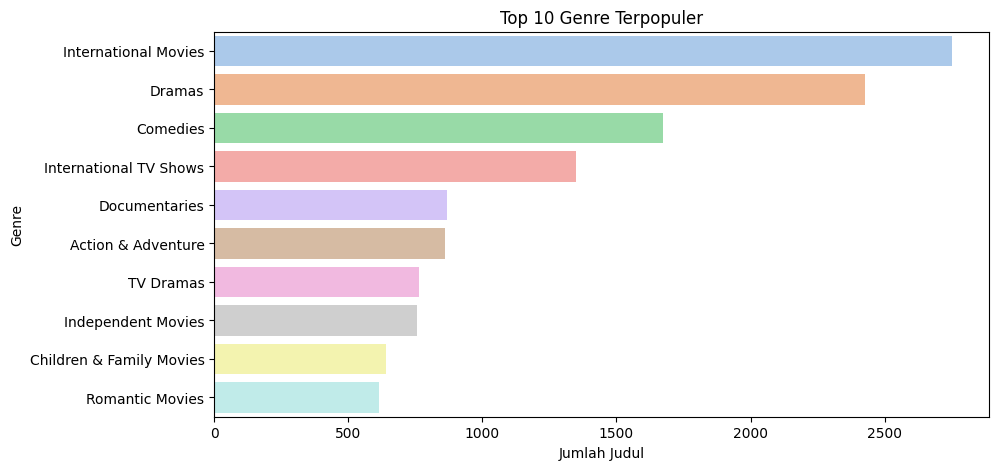

In [41]:
from collections import Counter

genre_series = df['listed_in'].dropna().apply(lambda x: x.split(', '))
genre_flat = [item.strip() for sublist in genre_series for item in sublist]
top_genres = Counter(genre_flat).most_common(10)

genres, counts = zip(*top_genres)

plt.figure(figsize=(10,5))
sns.barplot(x=list(counts), y=list(genres), palette='pastel')
plt.title('Top 10 Genre Terpopuler')
plt.xlabel('Jumlah Judul')
plt.ylabel('Genre')
plt.show()


In [42]:
print(df['duration'].head())

0       90 min
1    2 Seasons
2     1 Season
3     1 Season
4    2 Seasons
Name: duration, dtype: object


In [43]:
df[['duration_int', 'duration_type']] = df['duration'].str.extract(r'(\d+)\s*(\w+)')
df['duration_int'] = pd.to_numeric(df['duration_int'], errors='coerce')

In [44]:
df[['duration', 'duration_int', 'duration_type']].head()

,duration,duration_int,duration_type
0,90 min,90.0,min
1,2 Seasons,2.0,Seasons
2,1 Season,1.0,Season
3,1 Season,1.0,Season
4,2 Seasons,2.0,Seasons


In [45]:
movies_df = df[df['type'] == 'Movie']

print(movies_df[['duration', 'duration_int']].head())

   duration  duration_int
0    90 min          90.0
6    91 min          91.0
7   125 min         125.0
9   104 min         104.0
12  127 min         127.0


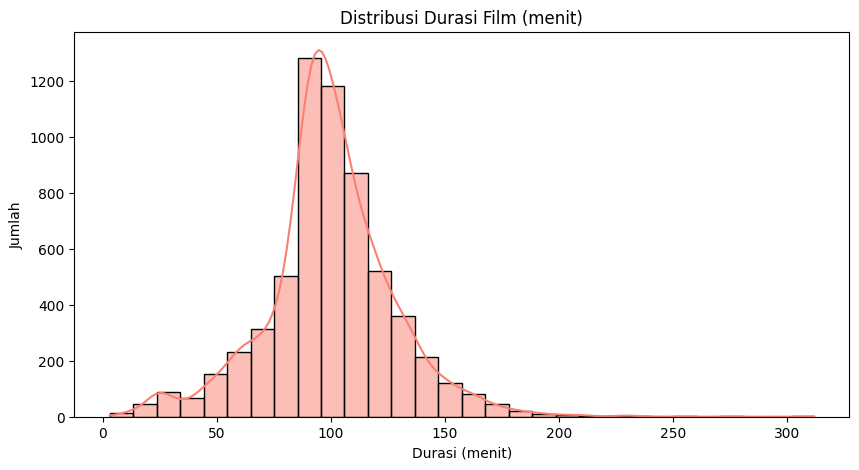

In [46]:
plt.figure(figsize=(10,5))
sns.histplot(movies_df['duration_int'].dropna(), bins=30, kde=True, color='salmon')
plt.title('Distribusi Durasi Film (menit)')
plt.xlabel('Durasi (menit)')
plt.ylabel('Jumlah')
plt.show()

In [92]:
!pip install streamlit pyngrok


In [100]:
%%writefile app.py
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

st.set_page_config(page_title="Dashboard Netflix Lengkap", layout="wide")
st.title("📺 Dashboard Analisis Netflix Titles")

uploaded_file = st.file_uploader("📂 Upload file netflix_titles.csv", type="csv")

if uploaded_file is not None:
    df = pd.read_csv(uploaded_file)

    # Preprocessing
    df['director'] = df['director'].fillna('Unknown')
    df['cast'] = df['cast'].fillna('Unknown')
    df['country'] = df['country'].fillna('Unknown')
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
    df['rating'] = df['rating'].fillna('Unknown')
    df[['duration_int', 'duration_type']] = df['duration'].str.extract(r'(\d+)\s*(\w+)?')
    df['duration_int'] = pd.to_numeric(df['duration_int'], errors='coerce')

    st.subheader("📊 Distribusi Tipe Konten")
    fig1, ax1 = plt.subplots(figsize=(6, 4))
    sns.countplot(x='type', data=df, palette='Set2', ax=ax1)
    ax1.set_title('Distribusi Tipe Konten')
    st.pyplot(fig1)

    st.subheader("📅 Jumlah Rilis per Tahun")
    fig2, ax2 = plt.subplots(figsize=(12, 6))
    df['release_year'].value_counts().sort_index().plot(kind='bar', color='coral', ax=ax2)
    ax2.set_title('Jumlah Rilis per Tahun')
    ax2.set_xlabel('Tahun Rilis')
    ax2.set_ylabel('Jumlah Judul')
    st.pyplot(fig2)

    st.subheader("🌍 10 Negara Terbanyak Produksi Konten")
    top_countries = df['country'].value_counts().head(10)
    fig3, ax3 = plt.subplots(figsize=(10, 6))
    sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis', ax=ax3)
    ax3.set_title('10 Negara Terbanyak Produksi Konten')
    ax3.set_xlabel('Jumlah Judul')
    ax3.set_ylabel('Negara')
    st.pyplot(fig3)

    st.subheader("🎭 Top 10 Genre Terpopuler")
    genre_series = df['listed_in'].dropna().apply(lambda x: x.split(', '))
    genre_flat = [item.strip() for sublist in genre_series for item in sublist]
    top_genres = Counter(genre_flat).most_common(10)
    genres, counts = zip(*top_genres)
    fig4, ax4 = plt.subplots(figsize=(10, 5))
    sns.barplot(x=list(counts), y=list(genres), palette='pastel', ax=ax4)
    ax4.set_title('Top 10 Genre Terpopuler')
    ax4.set_xlabel('Jumlah Judul')
    ax4.set_ylabel('Genre')
    st.pyplot(fig4)

    st.subheader("⏱️ Distribusi Durasi Film (Menit)")
    movies_df = df[df['type'] == 'Movie']
    fig5, ax5 = plt.subplots(figsize=(10, 5))
    sns.histplot(movies_df['duration_int'].dropna(), bins=30, kde=True, color='salmon', ax=ax5)
    ax5.set_title('Distribusi Durasi Film (menit)')
    ax5.set_xlabel('Durasi (menit)')
    ax5.set_ylabel('Jumlah')
    st.pyplot(fig5)
else:
    st.info("Silakan upload file `netflix_titles.csv` untuk memulai.")


Overwriting app.py


In [101]:
!ngrok config add-authtoken 2yPe3Q9JJvw1Ham1VvQsJEi53Oq_vmQ2C5Dunx2MDmasivTL

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [102]:
from pyngrok import ngrok

# Jalankan Streamlit sebagai background process
!streamlit run app.py &>/dev/null &

# Buka tunnel di port 8501
public_url = ngrok.connect(addr="8501")
print(f"🌐 Dashboard aktif di sini: {public_url}")


🌐 Dashboard aktif di sini: NgrokTunnel: "https://b33a-35-199-33-228.ngrok-free.app" -> "http://localhost:8501"
